In [1]:
import numpy as np
import pandas as pd

# Object creation
### See the Intro to data structures section.

* Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s= pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

* Creating a DataFrame by passing a NumPy array, with a datetime index using date_range() and labeled columns:

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index= dates, columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,1.395195,0.121450,-0.802492,0.050950
2013-01-02,0.669096,0.569340,-1.679145,-0.533727
2013-01-03,-0.029782,0.321030,-0.277086,-1.500022
2013-01-04,-0.111242,0.753294,-0.184407,-1.359006
2013-01-05,-1.334240,1.492601,-0.275713,1.662343
2013-01-06,-0.395961,-1.636819,0.675821,-0.279182


* Creating a DataFrame by passing a dictionary of objects that can be converted into a series-like structure:

In [10]:
df2 = pd.DataFrame ( 
    {
        "A": 1.0,
        "B": pd.Timestamp('20221003'),
        "C": pd.Series(1, index = list(range(4)), dtype = "float32"),
        "D": np.array([3] *4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2022-10-03,1.0,3,test,foo
1,1.0,2022-10-03,1.0,3,train,foo
2,1.0,2022-10-03,1.0,3,test,foo
3,1.0,2022-10-03,1.0,3,train,foo


* The columns of the resulting DataFrame have different dtypes:


In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

* If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [15]:
dir(df2) 

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '_

# Viewing data
### See the Basics section.

* Use DataFrame.head() and DataFrame.tail() to view the top and bottom rows of the frame respectively:

In [16]:
df.head()

,A,B,C,D
2013-01-01,1.395195,0.121450,-0.802492,0.050950
2013-01-02,0.669096,0.569340,-1.679145,-0.533727
2013-01-03,-0.029782,0.321030,-0.277086,-1.500022
2013-01-04,-0.111242,0.753294,-0.184407,-1.359006
2013-01-05,-1.334240,1.492601,-0.275713,1.662343


In [17]:
df2.tail(3)

,A,B,C,D,E,F
1,1.0,2022-10-03,1.0,3,train,foo
2,1.0,2022-10-03,1.0,3,test,foo
3,1.0,2022-10-03,1.0,3,train,foo


In [18]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.111242,0.753294,-0.184407,-1.359006
2013-01-05,-1.334240,1.492601,-0.275713,1.662343
2013-01-06,-0.395961,-1.636819,0.675821,-0.279182


* Display the DataFrame.index or DataFrame.columns:

In [20]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

#### DataFrame.to_numpy() gives a NumPy representation of the underlying data. 
* Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. 

* When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

* For df, our DataFrame of all floating-point values, and DataFrame.to_numpy() is fast and doesn’t require copying data:

In [23]:
df.to_numpy()

array([[ 1.39519502,  0.12145043, -0.80249206,  0.0509505 ],
       [ 0.66909623,  0.56933987, -1.67914506, -0.53372728],
       [-0.0297825 ,  0.32102986, -0.2770864 , -1.50002212],
       [-0.11124208,  0.75329434, -0.184407  , -1.3590058 ],
       [-1.33424   ,  1.49260119, -0.27571309,  1.66234325],
       [-0.39596117, -1.63681885,  0.67582094, -0.27918241]])

In [24]:
df2.to_numpy()

array([[1.0, Timestamp('2022-10-03 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2022-10-03 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2022-10-03 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2022-10-03 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

_Note DataFrame.to_numpy() does not include the index or column labels in the output._

* describe() shows a quick statistic summary of your data:

In [25]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.032178,0.270149,-0.423837,-0.326441
std,0.931482,1.046763,0.778361,1.147726
min,-1.334240,-1.636819,-1.679145,-1.500022
25%,-0.324781,0.171345,-0.671141,-1.152686
50%,-0.070512,0.445185,-0.276400,-0.406455
75%,0.494377,0.707306,-0.207234,-0.031583
max,1.395195,1.492601,0.675821,1.662343


In [26]:
df.head()

,A,B,C,D
2013-01-01,1.395195,0.121450,-0.802492,0.050950
2013-01-02,0.669096,0.569340,-1.679145,-0.533727
2013-01-03,-0.029782,0.321030,-0.277086,-1.500022
2013-01-04,-0.111242,0.753294,-0.184407,-1.359006
2013-01-05,-1.334240,1.492601,-0.275713,1.662343


* Transposing your data:

In [27]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.395195,0.669096,-0.029782,-0.111242,-1.334240,-0.395961
B,0.121450,0.569340,0.321030,0.753294,1.492601,-1.636819
C,-0.802492,-1.679145,-0.277086,-0.184407,-0.275713,0.675821
D,0.050950,-0.533727,-1.500022,-1.359006,1.662343,-0.279182


* DataFrame.sort_index() sorts by an axis:

In [28]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.050950,-0.802492,0.121450,1.395195
2013-01-02,-0.533727,-1.679145,0.569340,0.669096
2013-01-03,-1.500022,-0.277086,0.321030,-0.029782
2013-01-04,-1.359006,-0.184407,0.753294,-0.111242
2013-01-05,1.662343,-0.275713,1.492601,-1.334240
2013-01-06,-0.279182,0.675821,-1.636819,-0.395961


In [29]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,-0.395961,-1.636819,0.675821,-0.279182
2013-01-05,-1.334240,1.492601,-0.275713,1.662343
2013-01-04,-0.111242,0.753294,-0.184407,-1.359006
2013-01-03,-0.029782,0.321030,-0.277086,-1.500022
2013-01-02,0.669096,0.569340,-1.679145,-0.533727
2013-01-01,1.395195,0.121450,-0.802492,0.050950


* DataFrame.sort_values() sorts by values:

In [31]:
df.sort_values(by='B') #default True

,A,B,C,D
2013-01-06,-0.395961,-1.636819,0.675821,-0.279182
2013-01-01,1.395195,0.121450,-0.802492,0.050950
2013-01-03,-0.029782,0.321030,-0.277086,-1.500022
2013-01-02,0.669096,0.569340,-1.679145,-0.533727
2013-01-04,-0.111242,0.753294,-0.184407,-1.359006
2013-01-05,-1.334240,1.492601,-0.275713,1.662343


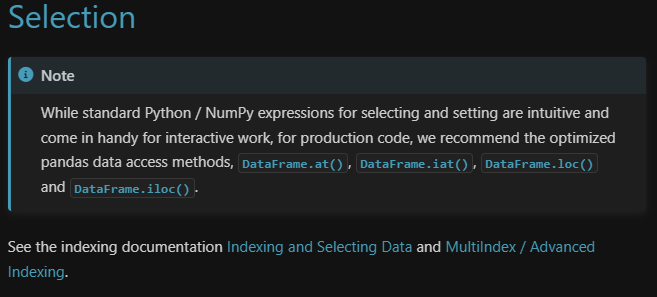

# Getting
### Selecting a single column, which yields a Series, equivalent to df.A:

* Selecting via [] (_ _getitem_ _), which slices the rows:

In [33]:
df[["A"]]

,A
2013-01-01,1.395195
2013-01-02,0.669096
2013-01-03,-0.029782
2013-01-04,-0.111242
2013-01-05,-1.334240
2013-01-06,-0.395961


In [35]:
df[0:3]

,A,B,C,D
2013-01-01,1.395195,0.12145,-0.802492,0.050950
2013-01-02,0.669096,0.56934,-1.679145,-0.533727
2013-01-03,-0.029782,0.32103,-0.277086,-1.500022


In [36]:
df["2013-01-02":"2013-01-05"]

,A,B,C,D
2013-01-02,0.669096,0.569340,-1.679145,-0.533727
2013-01-03,-0.029782,0.321030,-0.277086,-1.500022
2013-01-04,-0.111242,0.753294,-0.184407,-1.359006
2013-01-05,-1.334240,1.492601,-0.275713,1.662343


# Selection by label
### See more in Selection by Label using DataFrame.loc() or DataFrame.at().

* For getting a cross section using a label:

In [42]:
df.loc[df.index[0]]

#OR -> df.loc[dates[0]]

A    1.395195
B    0.121450
C   -0.802492
D    0.050950
Name: 2013-01-01 00:00:00, dtype: float64

* Selecting on a multi-axis by label:

In [43]:
df.loc[:, ['A','B']]

,A,B
2013-01-01,1.395195,0.121450
2013-01-02,0.669096,0.569340
2013-01-03,-0.029782,0.321030
2013-01-04,-0.111242,0.753294
2013-01-05,-1.334240,1.492601
2013-01-06,-0.395961,-1.636819


* Showing label slicing, both endpoints are included:

In [44]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.669096,0.569340
2013-01-03,-0.029782,0.321030
2013-01-04,-0.111242,0.753294


* Reduction in the dimensions of the returned object:



In [47]:
df.loc["20130102", ["A", "B"]]

A    0.669096
B    0.569340
Name: 2013-01-02 00:00:00, dtype: float64

* For getting a scalar value:



In [48]:
df.loc[dates[0],'A']

1.3951950157436233

* For getting fast access to a scalar (equivalent to the prior method):


In [49]:
df.at[dates[0], 'A']

1.3951950157436233

# Selection by position
### See more in Selection by Position using DataFrame.iloc() or DataFrame.at().

* Select via the position of the passed integers:

In [51]:
df.iloc[3]

A   -0.111242
B    0.753294
C   -0.184407
D   -1.359006
Name: 2013-01-04 00:00:00, dtype: float64

* By integer slices, acting similar to NumPy/Python:

In [52]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.111242,0.753294
2013-01-05,-1.334240,1.492601


* By lists of integer position locations, similar to the NumPy/Python style:

In [53]:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,0.669096,-1.679145
2013-01-03,-0.029782,-0.277086
2013-01-05,-1.334240,-0.275713


* For slicing rows explicitly:

In [54]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.669096,0.56934,-1.679145,-0.533727
2013-01-03,-0.029782,0.32103,-0.277086,-1.500022


* For slicing columns explicitly:



In [55]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.121450,-0.802492
2013-01-02,0.569340,-1.679145
2013-01-03,0.321030,-0.277086
2013-01-04,0.753294,-0.184407
2013-01-05,1.492601,-0.275713
2013-01-06,-1.636819,0.675821


* For getting a value explicitly:



In [56]:
df.iloc[1,1]

0.5693398656167743

* For getting fast access to a scalar (equivalent to the prior method):


In [57]:
df.iat[1,1]

0.5693398656167743

# Boolean indexing
### Using a single column’s values to select data:

In [58]:
df[df["A"]>0]

,A,B,C,D
2013-01-01,1.395195,0.12145,-0.802492,0.050950
2013-01-02,0.669096,0.56934,-1.679145,-0.533727


* Selecting values from a DataFrame where a boolean condition is met:



In [59]:
df[df>0]

,A,B,C,D
2013-01-01,1.395195,0.121450,NaN,0.050950
2013-01-02,0.669096,0.569340,NaN,NaN
2013-01-03,NaN,0.321030,NaN,NaN
2013-01-04,NaN,0.753294,NaN,NaN
2013-01-05,NaN,1.492601,NaN,1.662343
2013-01-06,NaN,NaN,0.675821,NaN


* Using the isin() method for filtering:


In [61]:
df2 = df.copy()
df2["E"] = ["one","one", "two", 'three', 'four','three']
df2

,A,B,C,D,E
2013-01-01,1.395195,0.121450,-0.802492,0.050950,one
2013-01-02,0.669096,0.569340,-1.679145,-0.533727,one
2013-01-03,-0.029782,0.321030,-0.277086,-1.500022,two
2013-01-04,-0.111242,0.753294,-0.184407,-1.359006,three
2013-01-05,-1.334240,1.492601,-0.275713,1.662343,four
2013-01-06,-0.395961,-1.636819,0.675821,-0.279182,three


In [62]:
df2[df2["E"].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.029782,0.321030,-0.277086,-1.500022,two
2013-01-05,-1.334240,1.492601,-0.275713,1.662343,four


# Setting
### Setting a new column automatically aligns the data by the indexes:

In [73]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range("20130102", periods=6))
s1
df['F']= s1
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.802492,0.050950,NaN
2013-01-02,0.669096,0.569340,-1.679145,-0.533727,1.0
2013-01-03,-0.029782,0.321030,-0.277086,-1.500022,2.0
2013-01-04,-0.111242,0.753294,-0.184407,-1.359006,3.0
2013-01-05,-1.334240,1.492601,-0.275713,1.662343,4.0
2013-01-06,-0.395961,-1.636819,0.675821,-0.279182,5.0


* Setting values by label:



In [74]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.802492,0.050950,NaN
2013-01-02,0.669096,0.569340,-1.679145,-0.533727,1.0
2013-01-03,-0.029782,0.321030,-0.277086,-1.500022,2.0
2013-01-04,-0.111242,0.753294,-0.184407,-1.359006,3.0
2013-01-05,-1.334240,1.492601,-0.275713,1.662343,4.0
2013-01-06,-0.395961,-1.636819,0.675821,-0.279182,5.0


In [75]:
df.at[dates[0],"A"] = 0

* Setting values by position:



In [76]:
df.iat[0,1] = 0

* Setting by assigning with a NumPy array:



In [77]:
df.loc[:,"D"] = np.array([5]*len(df))

* The result of the prior setting operations:



In [78]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.802492,5,NaN
2013-01-02,0.669096,0.569340,-1.679145,5,1.0
2013-01-03,-0.029782,0.321030,-0.277086,5,2.0
2013-01-04,-0.111242,0.753294,-0.184407,5,3.0
2013-01-05,-1.334240,1.492601,-0.275713,5,4.0
2013-01-06,-0.395961,-1.636819,0.675821,5,5.0


* A where operation with setting:



In [82]:
df2 = df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.802492,-5,NaN
2013-01-02,-0.669096,-0.569340,-1.679145,-5,-1.0
2013-01-03,-0.029782,-0.321030,-0.277086,-5,-2.0
2013-01-04,-0.111242,-0.753294,-0.184407,-5,-3.0
2013-01-05,-1.334240,-1.492601,-0.275713,-5,-4.0
2013-01-06,-0.395961,-1.636819,-0.675821,-5,-5.0


# Missing data
### Pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

#### Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [90]:
df1 =df.reindex(index=dates[0:4],columns = list(df.columns)+["E"])

In [93]:
df1.loc[dates[0]:dates[1], "E"] = 1

In [94]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.802492,5,NaN,1.0
2013-01-02,0.669096,0.569340,-1.679145,5,1.0,1.0
2013-01-03,-0.029782,0.321030,-0.277086,5,2.0,NaN
2013-01-04,-0.111242,0.753294,-0.184407,5,3.0,NaN


* DataFrame.dropna() drops any rows that have missing data:



In [95]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.669096,0.56934,-1.679145,5,1.0,1.0


* DataFrame.fillna() fills missing data:



In [105]:
df1.fillna(value= 5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.802492,5,5.0,1.0
2013-01-02,0.669096,0.569340,-1.679145,5,1.0,1.0
2013-01-03,-0.029782,0.321030,-0.277086,5,2.0,5.0
2013-01-04,-0.111242,0.753294,-0.184407,5,3.0,5.0


* isna() gets the boolean mask where values are nan:



In [113]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations
### See the Basic section on Binary Ops.

## Stats
#### Operations in general exclude missing data.

* Performing a descriptive statistic:

In [114]:
df.mean()

A   -0.200355
B    0.249908
C   -0.423837
D    5.000000
F    3.000000
dtype: float64

* Same operation on the other axis:



In [117]:
df.mean(1)

2013-01-01    1.049377
2013-01-02    1.111858
2013-01-03    1.402832
2013-01-04    1.691529
2013-01-05    1.776530
2013-01-06    1.728608
Freq: D, dtype: float64

* Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension:



In [121]:
s= pd.Series([1,3,5,np.nan,6,8], index = dates).shift(1)
s

2013-01-01    NaN
2013-01-02    1.0
2013-01-03    3.0
2013-01-04    5.0
2013-01-05    NaN
2013-01-06    6.0
Freq: D, dtype: float64

In [126]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.802492,5,NaN
2013-01-02,0.669096,0.569340,-1.679145,5,1.0
2013-01-03,-0.029782,0.321030,-0.277086,5,2.0
2013-01-04,-0.111242,0.753294,-0.184407,5,3.0
2013-01-05,-1.334240,1.492601,-0.275713,5,4.0
2013-01-06,-0.395961,-1.636819,0.675821,5,5.0


In [127]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,-0.330904,-0.430660,-2.679145,4.0,0.0
2013-01-03,-3.029782,-2.678970,-3.277086,2.0,-1.0
2013-01-04,-5.111242,-4.246706,-5.184407,0.0,-2.0
2013-01-05,NaN,NaN,NaN,NaN,NaN
2013-01-06,-6.395961,-7.636819,-5.324179,-1.0,-1.0


# Apply
### DataFrame.apply() applies a user defined function to the data:

In [135]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.802492,5,NaN
2013-01-02,0.669096,0.569340,-2.481637,10,1.0
2013-01-03,0.639314,0.890370,-2.758724,15,3.0
2013-01-04,0.528072,1.643664,-2.943131,20,6.0
2013-01-05,-0.806168,3.136265,-3.218844,25,10.0
2013-01-06,-1.202130,1.499446,-2.543023,30,15.0


In [142]:
df.apply(lambda x: x.max()- x.min(), axis=1)

2013-01-01    5.802492
2013-01-02    6.679145
2013-01-03    5.277086
2013-01-04    5.184407
2013-01-05    6.334240
2013-01-06    6.636819
Freq: D, dtype: float64

# Histogramming


In [147]:
s = pd.Series(np.random.randint(0,7, size=10))
s

0    2
1    0
2    4
3    4
4    0
5    1
6    0
7    5
8    6
9    5
dtype: int32

In [148]:
s.value_counts()

0    3
5    2
4    2
6    1
2    1
1    1
dtype: int64

# String Methods
#### Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.



In [151]:
s=pd.Series(["A","B","C","Aaba","Baca",np.nan,"CABA","dog","cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [152]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [153]:
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [156]:
s.str.len()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
6    4.0
7    3.0
8    3.0
dtype: float64

# Merge
#### Concat
* pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

#### See the Merging section.

* Concatenating pandas objects together along an axis with concat():

In [157]:
df= pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.252177,-0.839915,-0.136941,0.456751
1,-1.876451,0.635107,-0.786412,0.304766
2,1.592228,1.936716,1.206696,0.589947
3,-0.367500,-0.487471,0.071226,0.222263
4,0.663641,-0.523586,0.149619,-1.281831
5,-0.127690,1.001387,-0.024614,0.093578
6,0.313283,-1.168275,1.025631,-1.553232
7,0.577321,0.111715,0.802489,0.419551
8,-0.199807,-0.106670,0.604015,0.085945
9,-1.954579,-0.096601,-1.123213,-0.015902


In [158]:
#break into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.252177 -0.839915 -0.136941  0.456751
 1 -1.876451  0.635107 -0.786412  0.304766
 2  1.592228  1.936716  1.206696  0.589947,
           0         1         2         3
 3 -0.367500 -0.487471  0.071226  0.222263
 4  0.663641 -0.523586  0.149619 -1.281831
 5 -0.127690  1.001387 -0.024614  0.093578
 6  0.313283 -1.168275  1.025631 -1.553232,
           0         1         2         3
 7  0.577321  0.111715  0.802489  0.419551
 8 -0.199807 -0.106670  0.604015  0.085945
 9 -1.954579 -0.096601 -1.123213 -0.015902]

In [160]:
pd.concat(pieces, keys=['x','y','z'])

0         1         2         3
x 0  0.252177 -0.839915 -0.136941  0.456751
  1 -1.876451  0.635107 -0.786412  0.304766
  2  1.592228  1.936716  1.206696  0.589947
y 3 -0.367500 -0.487471  0.071226  0.222263
  4  0.663641 -0.523586  0.149619 -1.281831
  5 -0.127690  1.001387 -0.024614  0.093578
  6  0.313283 -1.168275  1.025631 -1.553232
z 7  0.577321  0.111715  0.802489  0.419551
  8 -0.199807 -0.106670  0.604015  0.085945
  9 -1.954579 -0.096601 -1.123213 -0.015902

# Join
#### merge() enables SQL style join types along specific columns. See the Database style joining section.



In [161]:
left = pd.DataFrame({'key': ['foo','foo'], 'lval': [1,2]})
right = pd.DataFrame({'key': ['foo','foo'], 'lval': [4,5]})

In [162]:
left

,key,lval
0,foo,1
1,foo,2


In [163]:
right

,key,lval
0,foo,4
1,foo,5


In [169]:
pd.merge(left,right, on='key')

,key,lval_x,lval_y
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


* Another example that can be given is:

In [174]:
left =pd.DataFrame({'key': ['foo','bar'], 'lval':[1,2]})
right =pd.DataFrame({'key': ['foo','bar'], 'rval': [4,5]})

In [175]:
left

,key,lval
0,foo,1
1,bar,2


In [176]:
right

,key,rval
0,foo,4
1,bar,5


In [179]:
pd.merge(left,right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping
#### By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria

* Applying a function to each group independently

* Combining the results into a data structure

In [181]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-1.569544,0.068559
1,bar,one,0.232682,0.258607
2,foo,two,0.235269,-0.271586
3,bar,three,-0.636785,0.654485
4,foo,two,-0.319605,-0.147998
5,bar,two,-0.967075,0.504058
6,foo,one,-1.028333,1.311570
7,foo,three,0.377216,-1.566548


* Grouping and then applying the sum() function to the resulting groups:



In [184]:
df.groupby('A')[['C','D']].sum()

,C,D
A,,
bar,-1.371178,1.417150
foo,-2.304997,-0.606002


In [189]:
df.groupby(['A',"B"]).sum()

C         D
A   B                        
bar one    0.232682  0.258607
    three -0.636785  0.654485
    two   -0.967075  0.504058
foo one   -2.597877  1.380129
    three  0.377216 -1.566548
    two   -0.084335 -0.419583

# Reshaping
#### See the sections on Hierarchical Indexing and Reshaping.

###  Stack

In [191]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

In [192]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [193]:
index =pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [195]:
df= pd.DataFrame(np.random.randn(8,2), index =index, columns=['A','B'])
df

A         B
first second                    
bar   one     0.445853  0.750224
      two    -1.167267 -2.097885
baz   one     1.022307  0.238392
      two    -0.822064  1.341431
foo   one    -0.978151  0.846025
      two    -0.650993  1.970639
qux   one    -0.238131  1.628513
      two     1.620666  0.482834

In [197]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.445853  0.750224
      two    -1.167267 -2.097885
baz   one     1.022307  0.238392
      two    -0.822064  1.341431

In [200]:
df.loc[['bar','baz']]

A         B
first second                    
bar   one     0.445853  0.750224
      two    -1.167267 -2.097885
baz   one     1.022307  0.238392
      two    -0.822064  1.341431

* The stack() method “compresses” a level in the DataFrame’s columns:



In [211]:
stacked = df2.stack()
print(stacked)
stacked.loc['bar','one'].sum()

first  second   
bar    one     A    0.445853
               B    0.750224
       two     A   -1.167267
               B   -2.097885
baz    one     A    1.022307
               B    0.238392
       two     A   -0.822064
               B    1.341431
dtype: float64


1.196077235954996

* With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [212]:
stacked.unstack()

A         B
first second                    
bar   one     0.445853  0.750224
      two    -1.167267 -2.097885
baz   one     1.022307  0.238392
      two    -0.822064  1.341431

In [213]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.445853  1.022307
       B  0.750224  0.238392
two    A -1.167267 -0.822064
       B -2.097885  1.341431

In [217]:
stacked.unstack([0,1])

first        bar                 baz          
second       one       two       one       two
A       0.445853 -1.167267  1.022307 -0.822064
B       0.750224 -2.097885  0.238392  1.341431